In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import load_datasets
from utils.model_utils import initialize_model
from utils.train_utils import train_model
from utils.metrics import evaluate_model
from utils.visualization import plot_training, plot_confusion_matrix

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
num_epochs = 10
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



[INFO] Loading datasets...
[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: resnet18\n")
print("[INFO] Initializing ResNet18 model...")
model = initialize_model(
    model_name="densenet121",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: resnet18

[INFO] Initializing ResNet18 model...
[INFO] Model initialized successfully!


c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    num_epochs=num_epochs,
    device=device
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training...

Starting training...



Epoch [1/10]:
    Train Loss: 0.5682, Train Acc: 0.7213
    Val Loss:   0.4409, Val Acc:   0.7935
    Learning Rate: 0.001000



Epoch [2/10]:
    Train Loss: 0.3981, Train Acc: 0.8315
    Val Loss:   0.3880, Val Acc:   0.8408
    Learning Rate: 0.001000



Epoch [3/10]:
    Train Loss: 0.3358, Train Acc: 0.8585
    Val Loss:   0.3580, Val Acc:   0.8433
    Learning Rate: 0.001000



Epoch [4/10]:
    Train Loss: 0.3368, Train Acc: 0.8532
    Val Loss:   0.3463, Val Acc:   0.8433
    Learning Rate: 0.001000



Epoch [5/10]:
    Train Loss: 0.2881, Train Acc: 0.8802
    Val Loss:   0.3321, Val Acc:   0.8557
    Learning Rate: 0.001000



Epoch [6/10]:
    Train Loss: 0.2824, Train Acc: 0.8829
    Val Loss:   0.3196, Val Acc:   0.8706
    Learning Rate: 0.001000



Epoch [7/10]:
    Train Loss: 0.2751, Train Acc: 0.8861
    Val Loss:   0.3145, Val Acc:   0.8756
    Learning Rate: 0.001000



Epoch [8/10]:
    Train Loss: 0.2610, Train Acc: 0.8930
    Val Loss:   0.3289, Val Acc:   0.8781
    Learning Rate: 0.001000



Epoch [9/10]:
    Train Loss: 0.2703, Train Acc: 0.8919
    Val Loss:   0.3153, Val Acc:   0.8532
    Learning Rate: 0.001000



Epoch [10/10]:
    Train Loss: 0.2620, Train Acc: 0.8908
    Val Loss:   0.3056, Val Acc:   0.8682
    Learning Rate: 0.001000


Training complete!

[INFO] Training completed successfully!


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.9072847682119205, 'recall': 0.8616352201257862, 'f1-score': 0.8838709677419355, 'support': 159.0}, 'Fire': {'precision': 0.915057915057915, 'recall': 0.9442231075697212, 'f1-score': 0.9294117647058824, 'support': 251.0}, 'accuracy': 0.9121951219512195, 'macro avg': {'precision': 0.9111713416349178, 'recall': 0.9029291638477537, 'f1-score': 0.906641366223909, 'support': 410.0}, 'weighted avg': {'precision': 0.9120434507932488, 'recall': 0.9121951219512195, 'f1-score': 0.9117508214930347, 'support': 410.0}}, 'confusion_matrix': array([[137,  22],
       [ 14, 237]]), 'roc_auc': np.float64(0.9029291638477537)}


[INFO] Saving training and evaluation results...


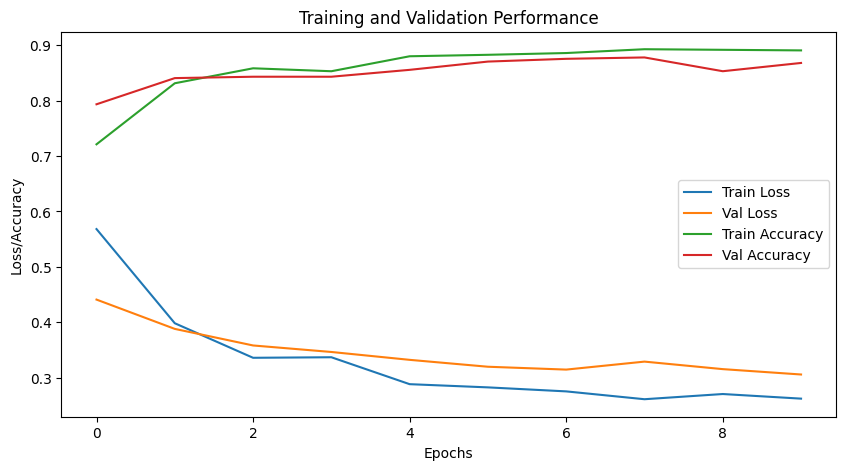

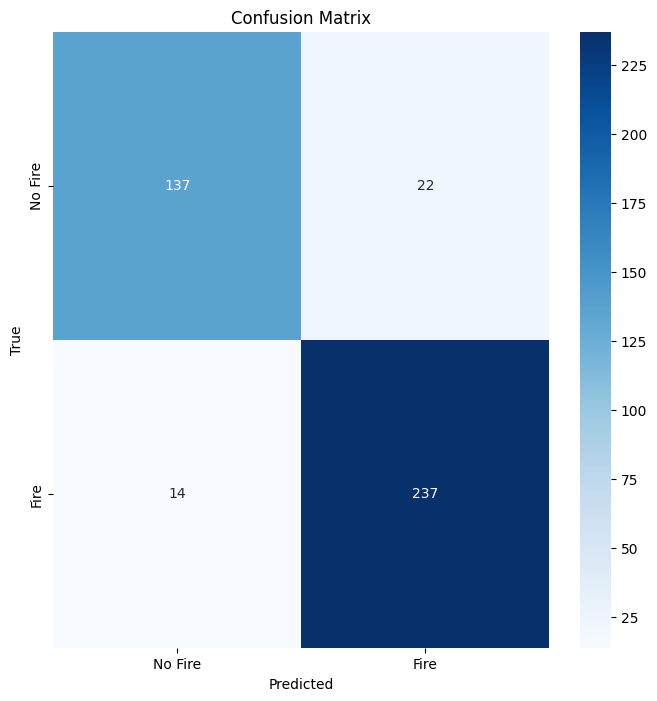

[INFO] Results saved successfully!


In [10]:
print("[INFO] Saving training and evaluation results...")
plot_training(history, "outputs/resnet18_baseline_training_curve.png")
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path="outputs/resnet18_baseline_confusion_matrix.png"
)
print("[INFO] Results saved successfully!")